# A Bayesian approach to model 'fitting'
### August George - 11/2020
#### Zuckerman Lab - OHSU

These notes were prepared for a class presentation. You will need install the pyMC3 and arviz python libraries to run it.  

## Introduction:

Here we investigate Bayesian inference by using a familiar linear model with noise. Given the uncertainty of the data, we would like to estimate a distribution for each model parameter (e.g. slope, intercept). In Bayesian terms we want the posterior - the conditional probability of the model parameters given the data. 

In this notebook we introduce the basic concepts of Bayes' theorem, and Markov Chain Monte Carlo sampling. We analyze and compare the posterior distributions over a range of conditions for a linear model such as different data set changes. Finally, we examine the credible regions over a range of conditions. 

In [ ]:
from IPython.display import Image
Image(filename="linear_model.png", width = 400, height = 400)

## Motivation:

Suppose we do an experiment and observe the data above. What model do we expect? How can we find the slope and intercept? Also, how can we characterize the variance in the data?

One common method is linear regression:

+ Provides a *point estimate* of the best fit for the parameters (e.g. maximum likelihood estimation)

An alternative is Bayesian inference:

+ Provides a *distribution* for each model parameter given the data

## Bayes' Theorem:

Bayesian inference is based on Bayes' theorem. Below is a brief explanation to provide intuition on Bayes' theorem. 

In [1]:
Image(filename="bayes_1.png", width = 400, height = 400)

NameError: name 'Image' is not defined

Suppose there are two events, A, and B, and the probability of either event occuring is P(A) and P(B) respectively. Each circle represents the total probability of event A or B occuring. 

In [ ]:
Image(filename="bayes_2.png", width = 400, height = 400)

What is the probability of event 'A' happening, given the event B has happened? 

Since event B happened we are constrainted to the red 'B' circle on the right. The probability that event 'A' happened is the intersection between the 'A' and 'B' circles. The probability that event 'A' happened given event 'B' happened is then the ratio of the intersection of 'A' and 'B', to the total probability of 'B'

More formally: $P(A|B) = \dfrac{P(A\cap B)}{P(B)}$

Similarly for the probabilty of event 'B' happening given event 'A' happened: $P(B|A) = \dfrac{P(A\cap B)}{P(A)}$

Since both the above equations have the 'intersection' term, we can set them equal to eachother to find the common form of Bayes' theorem:

$P(A|B) = \dfrac{P(A\cap B)}{P(B)}  \longrightarrow P(A\cap B) = P(A|B) \cdot P(B)$ 

*and*

$P(B|A) = \dfrac{P(A\cap B)}{P(A)}  \longrightarrow P(A\cap B) = P(B|A) \cdot P(A)$

$ \Rightarrow $ **Bayes' Theorem:** $P(B|A) = \dfrac{P(A|B) \cdot P(B)}{P(A)}$

#### Bayes' theorem using distributions:


Instead of using point estimates, we can reforumlate Bayes' theorem using probability distributions:

$p(\theta | \mathrm{data}) = \dfrac{\mathcal{p}(\mathrm{data} | \theta ) \cdot p(\theta)}{p(\mathrm{data})}$


These dsitributions are commonly refered to as: $posterior = \dfrac{likelihood \cdot prior}{evidence}$

**posterior**, $p(\theta | \mathrm{data})$: probability distribution of the model parameters given the data set

**likelihood**, $\mathcal{p}(\mathrm{data} | \theta )$: probability distribution of the data given a set of parameters

**prior**, $p(\theta)$: probability distribution of the parameters - before using the data

**evidence**, $p(\mathrm{data})$: probability distribution of the data - before using the parameters

## Model 'fitting' w/ Bayes' Theorem

We want to find the posterior, the *distribution* of parameters given the data set. 

Calculating this directly is often difficult because of the evidence term:
$p(\mathrm{data}) = {\displaystyle \int_{\theta}^{} p(\mathrm{data} | \theta ) p(\theta)  \ \mathrm{d}\theta }$

The evidence distribution is a normalization term, so we can omit it and rewrite Bayes' theorem using a proportionalilty constant

**Bayes' Theorem:** $p(\theta | \mathrm{data}) \propto p(\mathrm{data} | \theta ) \cdot p(\theta)$

#### Markov chain Monte Carlo (MCMC)

One way to find the posterior is to use Markov Chain Monte Carlo sampling

Here the approach is to generate a Markov chain with a stationary (equilibrium) distribution that is proportional to the desired (i.e. $p(\theta | \mathrm{data})$) distribution. 

With enough samples, this Markov chain will also be proportional to the desired distribution. 

A common method for this is the random walk Metropolis-Hastings algorithm.

### Random walk Metropolis-Hastings Monte Carlo 


1. Intialization: Choose initial $\theta_{t=0}$ 
2. For $t = 1,...,m$:  
    1. Select canditate $\theta^{*}$ from a symmetric (e.g. Gaussian) distribution: $q(\theta^{*}|\theta_{t-1})$
    2. Calculate acceptance ratio: $\alpha = \dfrac{p(\mathrm{data} | \theta^{*} ) \cdot p(\theta^{*})}{p(\mathrm{data} | \theta_{t-1} ) \cdot p(\theta_{t-1})}$
    3. For $\alpha \geq 1$:
        1. accept candidate: $\theta_{t} \leftarrow \theta^*$
       
       For  $0 < \alpha < 1$:
        1. accept candidate: $\theta_{t} \leftarrow \theta^*$ with probability $\alpha$
        2. reject candidate: $\theta_{t} \leftarrow \theta_{t-1}$ with probability $1-\alpha$

### Useful definitions:

##### Gaussian (Normal) distribution: $p(x) = \dfrac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{1}{2} \left(\frac{x-\mu}{\sigma}\right)^2 }$

# Linear model example

In [ ]:
Image(filename="linear_model.png", width = 400, height = 400)

We want to find the model parameters that best fit the observed data. Let's assume a Gaussian distribution for the noise with a mean of zero and constant variance. For a linear model with this noise distribution we will need to find the posterior distribution for the slope, intercept, and noise variance.

Assumed model: $y_{i} = (ax_{i} + b) + \epsilon_{i}$, 

where $\epsilon$ is drawn from a Normal distribution: $N(\mu_{\epsilon}=0, \sigma_{\epsilon}=\sigma_{\mathrm{True}})$.

Parameters we want to estimate, $\theta = (a, b, \sigma_{\mathrm{True}})$

To use the Markov Chain Monte Carlo sampling we will need to guess a prior and calculate the likelihood. Let's assume Guassian priors for each parameter. The likelihood is calculated by combining the probabilities of each observed datapoint values and the estimated parameter values. In this example the liklihood is calculated from a Gaussian distribution with a mean of the estimated output (i.e. $ax_{i}+b$) and variance. 

Priors: Choose distributions, $p(\theta) = p(a)\cdot p(b) \cdot p(\sigma_{\epsilon})$ 

Likelihood: $p(\mathrm{data} | \theta ) = p(y | (a,b,\sigma_{\epsilon}) )$ 
$ = \prod_{i} p(y_{i} | (a,b,\sigma_{\epsilon}) = \prod_{i} \dfrac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{1}{2} \left(\frac{y_{i}-(ax_{i}+b)}{\sigma}\right)^2 }$


## Code example - intial linear model:

To demonstrate Bayesian inference we use Python with the pyMC3 library using a Markov Chain Monte Carlo sampler - NUTS.  

For the initial simulation we generate the data using 200 data points, a *slope* of 4, *intercept* of 2, and *standard deviation* of 0.5 for the Gaussian noise ( mean of zero). 

We first use a 'Normal' set of prior distributions:

$p(a) = p(b) = N(\mu=0, \sigma=20)$

$p(\sigma) = logN(\mu=0, \sigma=20)$


For reference:
**pyMC3 code example ** https://docs.pymc.io/notebooks/GLM-linear.html

In [ ]:
### Import libraries
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
from pymc3 import  *
import warnings
warnings.filterwarnings('ignore')


### Set display options
%config InlineBackend.figure_format = 'retina'
az.style.use('arviz-darkgrid')

In [ ]:
def generate_data(slope=4, intercept=2, sigma=0.5, data_size=200):
    
    ### True parameters for linear model
    true_slope = slope    
    true_intercept = intercept
    true_sigma = sigma

    ### Generate synthetic data 
    size = data_size
    x = np.linspace(0, 1, size)
    true_regression_line = true_intercept + true_slope * x  # y = a + b*x
    y = true_regression_line + np.random.normal(scale=true_sigma, size=size)  # add noise
    return (x,y,true_regression_line)

In [ ]:
def sampler(x,y, prior = 'normal', n_samples=200, chains=3, v=True):
    
    ### Construct model using pyMC3
    with Model() as model: 

        ### Define priors
        if prior == 'normal':
            sigma = Lognormal('sigma', 0, sigma=20)
            Intercept = Normal('Intercept', 0, sigma=20)
            x_coeff = Normal('slope', 0, sigma=20)
        elif prior == 'uniform':
            sigma = Uniform('sigma', 0,1)
            Intercept = Uniform('Intercept',-5, 5)
            x_coeff = Uniform('slope', -5, 5)
            
        ### Define likelihood
        likelihood = Normal('y', mu=Intercept + x_coeff * x,
                            sigma=sigma, observed=y)
        ### Inference
        if v:  # show progress bar
            trace = sample(n_samples, chains=chains, tune=2000) # draw posterior samples using NUTS 
        else: 
            trace = sample(n_samples, chains=chains, tune=2000, progressbar=False) # draw posterior samples using NUTS 
        
    return trace

In [ ]:
# Linear model (example 1) 
# data points = 200, slope = 4, intercept = 2, sigma = 0.5, prior -> normal distributions

x,y,y_true = generate_data()
trace = sampler(x,y, chains = 3)

In [ ]:
### Plot linear model w/ data
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel='x', ylabel='y', title='Data and underlying model')
ax.plot(x, y, 'x', label='data');
ax.plot(x, y_true, label='true linear model', lw=2.);
plt.legend(loc=0);

### MCMC Traces

Below we trace the (marginal) posterior distributions (left) and MCMC parameter values (right) for each parameter using three chains.

The mean for intercept, slope, and sigma posterior distributions are near the true values of 2, 4, and 0.5 respectively. 

The MCMC parameter values are stable over the course of the sampling - suggesting that it is indeed a stationary distribution. 

In [ ]:
### Plot traces
plt.figure(figsize=(7, 7))
az.plot_trace(trace);
plt.tight_layout();

## Posterior distributions with 95% high density interval (credible region)

Below we plot the (marginal) posterior distributions for the intercept, slope, and sigma for a single chain with the mean and 95% high density interval (~credible region).

In [ ]:
### Plot posterior w/ credible region
plt.figure(figsize=(7, 7))
az.plot_posterior(trace, hdi_prob=0.95);
plt.tight_layout();

In [ ]:
### function to graph different models together for comparison

def graph_comparisons(traces, m_names, p_names=['sigma', 'Intercept', 'slope']):       
    for i in range(len(p_names)):
        plt.figure(figsize=(7, 7)) 
        ax = az.plot_forest(traces,  
                    kind='ridgeplot',
                    var_names=p_names[i],
                    model_names = m_names,
                    combined=True,
                    ridgeplot_overlap=5,
                    ridgeplot_truncate=False,
                    hdi_prob = 0.95,
                    ridgeplot_quantiles = [.25,.5,.75],
                    colors=['blue', 'red', 'green'])        
        plt.tight_layout();
        ax[0].set_title('Comparing posterior distributions')

## Altering the standard deviation of the observed data

How do the posterior distributions change if the observed data has more or less variance? 

Below we use the same initial linear model above to estimate the posteriors for each parameter - except with different sigmas (0.5, 1.0, 2.0). The posteriors are then plotted for comparision. As expected, posterior distributions 'flatten' and become less informative as the variance of the data increases. 

In [ ]:
### more examples - comparing posteriors for different sigma values

sigmas = [0.5, 1, 2]
m_names = ['sigma = 0.5', 'sigma = 1.0', 'sigma = 2.0']
traces = []

for i in range(len(sigmas)):
    x,y,y_true = generate_data(sigma=sigmas[i])
    trace = sampler(x,y, chains = 1)
    traces.append(trace)
   
graph_comparisons(traces,m_names)    

## Altering the amount of data

How do the posterior distributions change for different dataset sizes?

Below we use the same initial linear model above to estimate the posteriors for each parameter - except with different dataset sizes (10, 100, 200). The posteriors are then plotted for comparision. As expected, posterior distributions 'flatten' and become less informative as the amount of data decreases. 

In [ ]:
### more examples - comparing posteriors for different data sizes

data_size = [10, 100, 200]
m_names = ['n = 10', 'n = 100', 'n = 200']
traces = []

for i in range(len(data_size)):
    x,y,y_true = generate_data(data_size=data_size[i])
    trace = sampler(x,y, chains = 1)
    traces.append(trace)
   
graph_comparisons(traces,m_names)   



## Altering the prior distributions

How do the posterior distributions change for different prior distributions - in the low data regime?

Below we use the same initial linear model above to estimate the posteriors for each parameter - except with a small dataset (n=10) and with different prior distribution sets, the 'Normal' priors described above, and 'Uniform' priors:

$p(a) = p(b) = \mathrm{Uniform}(-5,5)$

$p(\sigma) = \mathrm{Uniform}(0,1)$

The posteriors are then plotted for comparision. As expected, in the low data regime the choice of prior significantly alters the posterior distribution. So, when using a small amount of data, the priors should be chosen carefully. 

In [ ]:
### more examples - comparing posteriors for different prior distributions, low data regime

m_names = ['uniform', 'normal']
traces = []

for i in range(len(m_names)):
    x,y,y_true = generate_data(data_size=10)
    trace = sampler(x,y, chains = 1, prior = m_names[i])
    traces.append(trace)
   
graph_comparisons(traces,m_names)  



## Altering the prior distributions - large dataset

How do the posterior distributions change for different prior distributions - with a large dataset?

Below we use the same initial linear model above to estimate the posteriors for each parameter - except with a large dataset (n=200) and with different prior distribution sets, the 'Normal' priors described above, and 'Uniform' priors:

$p(a) = p(b) = \mathrm{Uniform}(-5,5)$

$p(\sigma) = \mathrm{Uniform}(0,1)$

The posteriors are then plotted for comparision. As expected, with a large dataset the choice of prior has less of an effect on the posterior distributions - although there still is a small difference in the posteriors.

In [ ]:
### more examples - comparing posteriors for different prior distributions, large data regime

m_names = ['uniform', 'normal']
traces = []

for i in range(len(m_names)):
    x,y,y_true = generate_data(data_size=500)
    trace = sampler(x,y, chains = 1, prior = m_names[i])
    traces.append(trace)
   
graph_comparisons(traces,m_names)  

## Investigating the credible region

How 'accurate' are the credible regions? How well does the observed coverage match the ideal credible region? 

We expect the correct value to be in a 95% credible region 95% of the time, but is this actually the case in the limit of a finite amount of data?

Here we perform several trials generating several posteriors for the initial linear model described above and calculate how many times the true value is in the credible region, for a range of credible regions (i.e. %5, 15%...95%). 

This is done for a) a large dataset (n = 200), b) a small dataset (n = 10) with Normal priors described above, and c) a small dataset (n=10) with Uniform priors described above.

The results indicate that for 100 trials there is not much of a difference between the observed coverage and the ideal credible region for the large dataset. Using a small dataset and different priors had a similar result. 

This suggests that the credible regions are fairly robust over different dataset sizes and prior distributions choices. 

In [ ]:
### Verifying credible regions - how well does the observed coverage match the ideal credible region?

# hide output messages from pymc3 (caution: can also hide warnings)
import logging, sys
logging.disable(sys.maxsize)


### go through different credible regions (i.e. 5%,15%...95%) and calculate the observed 'covereage' 
def verify_cr(p):  # p = [n iter, data size, prior dist.]
        
    regions = [(i*10 + 5)/100 for i in range(10)]
    results = []
    a = 4 
    b = 2
    s = 0.5

    a_count = [0 for i in range(len(regions))]
    b_count = [0 for i in range(len(regions))]
    s_count = [0 for i in range(len(regions))]
    n = p[0]

    for i in range(n):

        if i%10 == 0:
            print(f'iteration {i}')

        ### generate dataset: slope = 4, intercept = 2, sigma = 0.5
        ### user parameters for data size and prior dist.
        
        x,y,y_true = generate_data(data_size = p[1])
        trace = sampler(x,y, chains = 1, prior = p[2], v=False) 

        ### calculate credible region (HDI) and check if the true values are inside
        for i in range(len(regions)):
            hdi=stats.hpd(trace, hdi_prob=regions[i])
            a_low = hdi['slope'][0]
            a_high = hdi['slope'][1]
            b_low = hdi['Intercept'][0]
            b_high = hdi['Intercept'][1]
            s_low = hdi['sigma'][0]
            s_high = hdi['sigma'][1]

            if a_low <= a <= a_high:
                a_count[i] = a_count[i] + 1 
            if b_low <= b <= b_high:
                b_count[i] = b_count[i] + 1  
            if s_low <= s <= s_high:
                s_count[i] = s_count[i] + 1 

    # print observed coverage for each region (i.e. 5%, 15%....95%)
    print(f'slope: {np.asarray(a_count)/(1.0*n)}, intercept: {np.asarray(b_count)/(1.0*n)}, sigma: {np.asarray(s_count)/(1.0*n)}')
    
 
    # return credible regions
    cr = [np.asarray(a_count)/(1.0*n), np.asarray(b_count)/(1.0*n), np.asarray(s_count)/(1.0*n)]

    return cr


In [ ]:
def plot_cr(x,y_list,labels):  # plot credible region for each parameter


    for i in range(len(y)):
        plt.figure()
        plt.title(f'Confidence intervals: {labels[i+1]}, {labels[0]} trials')
        plt.xlabel(f'ideal credible region')
        plt.ylabel(f'observed coverage') 
        plt.plot(x,x, '--', label='ref.')
        plt.plot(x, y[i][0], label = 'large dataset, Normal prior' )
        plt.plot(x, y[i][1], label = 'small dataset, Normal prior' )
        plt.plot(x, y[i][2], label = 'small dataset, Uniform prior')
        plt.legend()
        plt.show()

In [ ]:
### examine credible regions: large dataset

p = [100, 200, 'normal']  # [n iterations, data size, posterior]
cr1 = verify_cr(p)

In [ ]:
### examine credible regions: small dataset, normal prior

p = [100, 10, 'normal']  # [n iterations, data size, posterior]
cr2 = verify_cr(p)

In [ ]:
### examine credible regions: small dataset, uniform prior

p = [100, 10, 'uniform']  # [n iterations, data size, posterior]
cr3 = verify_cr(p)

In [ ]:
# plot comparisons
x = [(i*10 + 5)/100 for i in range(10)]
y = [cr1, cr2, cr3]
labels = [100, 'slope', 'intercept', 'sigma']

plot_cr(x, y, labels)

## Bayesian analysis for reaction networks using tellurium and pymc3

### How do I calculate a complex likelihood using pymc3?

Suppose we are given data for an experiment which measures the flux of a reaction over time. Based on this data we would like to find the posterior distributions for the rate constants that goven the reaction, as well as the variance (e.g. noise) in the experimental data. To do this, we can use a combinatation of tools: Tellurium to model and simulate the reaction, and pymc3 to perform the Bayesian inference. However, unlike the previous examples, calculating the likelihood will require a custom function.

### Example:
As an example, consider a simple reaction, $A \longleftrightarrow B$. Given the data, initial values, and priors, what are the the distribution of the rate constants ($k_1$ and $k_2$) and noise variance $\sigma$?


#### Model specification
The change in the concentration of each reaction species is given by an ordiniary differential equation: 

$ \dfrac{d[A]}{dt} = -k_1[A] + k_2[B]$  and  $\dfrac{d[B]}{dt} = -k_2[B] + k_1[A]$, 

where [X] denotes the concentration of species X, and $k_1$ and $k_2$ are the forward and reverse rate constants.
<br/><br/>

The flux of the reaction is defined as: $J_{A \rightarrow B}(t) = V\cdot(k_1[A](t) - k_2[B](t))$ , where V is the volume containing the reaction.
<br/><br/>

Along with the flux data, we are also given the initial species concentrations and the volume size: 

$[A](0) = 2[B](0) = 4.25\mathrm{e}{-8} \mathrm{M}$ and $V = 1\mathrm{e}{-4} \mathrm{L}$.
<br/><br/>

With this information, calculating the flux now amounts to solving an initial value problem.


#### Bayesian priors

For this example we will choose uniform priors for each parameter. The rate contants will have a uniform prior distribution with a lower bound of 0, and an upper bound of 500. The noise variance will have a uniform prior distribution with a lower bound of 1e-12 and an upper bound of 5e-12. Note that for this example we are assuming Gaussian noise with a mean of zero and unkown variance. 


#### Implementation: Tellurium

We could manually create the model and solve initial value problem in Python to generate the flux. However, for large reaction networks this can become cumbersome. In this example we use Tellurium which is library designed to create, simulate, and visualize reaction networks. Tellurium allows the user to create a reaction network models using human readable text. Tellurium can then generate the flux data by solving the initial value problem using optimized ODE integrators. The Tellurium model can easily be updated with new parameters which then yield new flux traces for the Bayesian analysis. 

#### Implementation: Pymc3

In order to calculate the likelihood we need to compare the observed data to the predicted data based on the sampled parameter (e.g. rate constant) values. For this example, the predicted data is the flux that is calculated using an external library, Tellurium. Unlike the previous examples we cannot directly use the distributions to calculate the predicted values and the likelihood. Due to the operations we are performing (ODE integration) and the supported Theano datatype operations used by pymc3, we cannot pass the sampled parameter distributions into an external function as is. 

One solution is to create a custom 'black box' likelihood function and Theano operation. Essentially we must convert the pymc3 parameter distributions into something usable by our ODE integrator (e.g. a vector or list). Once converted, the parameter distributions can then be sent to an external 'black box' function to calculates the predicted values (i.e. flux) and the likelihood (i.e. Normal log-likelihood). We then create a custom Theano operation to perform the likelihood calulcation within the context of the pymc3 model during sampling. 

Note: some samplers such as NUTS require derivative information which is not shown in this example. 



#### Alternative solutions


Pymc3 has a built-in ODE integration which may remove the need to create a custom likelihood function and Theano Op. Another Python Bayesian library, Numpyro may also have a more elegent solution. 

#### References

[physical lens on the cell - reaction networks](http://physicallensonthecell.org/chemical-physics/basics-states-kinetics)

[Tellurium](https://tellurium.readthedocs.io/en/latest/)

[Pymc3](https://docs.pymc.io)

[blackbox lilihood function tutorial](https://docs.pymc.io/notebooks/blackbox_external_likelihood.html)

[bug fix for above tutorial](https://stackoverflow.com/questions/64267546/blackbox-likelihood-example)

[Pymc3 ODE docs](https://docs.pymc.io/notebooks/ODE_API_introduction.html)

[NumPyro docs](http://num.pyro.ai/en/latest/index.html#introductory-tutorials)


In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import root
import arviz as az
import pymc3 as pm
import theano.tensor as tt
import tellurium as te



# Set display options
%config InlineBackend.figure_format = 'retina'
az.style.use('arviz-darkgrid')

def my_logl(v):
        return logl(v)
    
# define a theano Op for our likelihood function
class LogLike(tt.Op):

    """
    Declare which datatype will be inputed and outputed when the Op is called.

    Modified from: 
    1) https://docs.pymc.io/notebooks/blackbox_external_likelihood.html
    2) https://stackoverflow.com/questions/64267546/blackbox-likelihood-example

    """

    itypes = [tt.dvector]  # input is a vector (model parameters)
    otypes = [tt.dscalar]  # outputs is a scalar (log-likelihood)

    def __init__(self, loglike, data):
        '''Initialize with required parameters to calculate the log-likelihood '''

        # inputs are class attributes
        self.likelihood = loglike  # a likelihood function
        self.data = data  # the observed data

    def perform(self, node, inputs, outputs):
        ''' this method is used when calling the Op'''

        (theta,) = inputs  # parameter values

        # call the custom log-likelihood function
        logl = self.likelihood(self.data, theta)

        # output the log-likelihood
        outputs[0][0] = np.array(logl)  



# how the log-likelihood (Normal) is calculated
def log_likelihood(y_obs, theta):
    '''normal log_likelihood'''

    k = [theta[0], theta[1]]
    sigma = theta[2]
    y_pred = flux_model(k)  # calculate predicted flux

    # Normal log likelihood = -(n/2)ln(2*pi) -(n/2)ln(sigma^2) -(1/(2simga^2))SUM(x_i-mu)^2
    logp = -len(y_obs) * np.log(np.sqrt(2.0 * np.pi) * sigma)
    logp += -np.sum((y_obs - y_pred) ** 2.0) / (2.0 * sigma ** 2.0) 
    return logp


# how the flux is calculated (update model k's then calculate flux)
def flux_model(k):
    '''single rxn network: OF <--> IF'''

    k1 = k[0]
    k2 = k[1]
    m.reset()  # reset rate model to initial conditions
    m['rxn1_k1'] = k1
    m['rxn1_k2'] = k2
    D1 = m.simulate(0,3e-2,300, selections=['time', 'rxn1'])
    y_calc = D1.T[1]
    return y_calc


# example model created using antimony for Tellurium
antimony_str = '''
// Created by libAntimony v2.12.0
model *myModel()

  // Compartments and Species:
  compartment compartment_;
  species A in compartment_, B in compartment_;

  // Reactions:
  rxn1: A -> B; compartment_*(rxn1_k1*A - rxn1_k2*B);

  // Species initializations:
  A = 4.25e-08;
  A has substance_per_volume;
  B = 2.125e-08;
  B has substance_per_volume;

  // Compartment initializations:
  compartment_ = 0.0001;
  compartment_ has volume;

  // Variable initializations:
  rxn1_k1 = 100;
  rxn1_k2 = 100;

  // Other declarations:
  const compartment_, rxn1_k1, rxn1_k2;

  // Unit definitions:
  unit substance_per_volume = mole / litre;
  unit volume = litre;
  unit length = metre;
  unit area = metre^2;
  unit time_unit = second;
  unit substance = mole;
  unit extent = mole;

  // Display Names:
  time_unit is "time";
end
'''

# load the anitmony string and convert it into a Tellurium model
m = te.loada(antimony_str)

# set the ODE integration settings 
m.integrator.absolute_tolerance = 1e-16
m.integrator.relative_tolerance = 1e-12

# true parameter values for ref
k1_true = 1e2
k2_true = 1e2
sd_true = 2e-12

# simulate 'observed' data
D = m.simulate(0,3e-2,300, selections=['time', 'rxn1'])
y_true = D.T[1].copy()  # true data (no noise)
y_obs = y_true + np.random.normal(loc=0.0, scale=sd_true, size=np.size(y_true))  # add Guassian noise

# create Theano Op class for out custom likelihood
# inputs a function (custom likelihood) and observed data 
logl = LogLike(log_likelihood, y_obs)

        
# pym3 sampler settings    
n_samples = np.int(1e4)  # number of samples for each chain
n_burn = np.int(1e3)  # number of (discarded) burn in



# use pymc3 to sample
with pm.Model():

    # set prior distributions w/ initial guess (testval)
    theta1 = pm.Uniform("theta_1", lower=0, upper=500,  testval=np.random.uniform(0,500))
    theta2 = pm.Uniform("theta_2", lower=0, upper=500,  testval=np.random.uniform(0,500))
    sigma1 = pm.Uniform("sigma_1", lower=1e-12, upper=5e-12, testval=np.random.uniform(1e-12,5e-12))

    # convert prior distributions to a tensor variable
    theta = tt.as_tensor_variable([theta1, theta2, sigma1])

    # create a likelihood 'potential' distribution
    # bug fix from tutorial: DensityDist does not work correctly
    # see: https://stackoverflow.com/questions/64267546/blackbox-likelihood-example
    # pm.Potential("like", logl(theta))  # debugging: alternative versions
    # pm.DensityDist(‘like’, my_mu(v), observed={‘v’: theta})  # debugging: alternative versions
    pm.DensityDist("likelihood", my_logl, observed={"v": theta})


    # use Metropolis MCMC sampling
    step = pm.Metropolis([theta1, theta2, sigma1])
    trace = pm.sample(n_samples, tune=n_burn, step=step, discard_tuned_samples=True, cores=2, chains=4)
    print(pm.summary(trace).to_string())  # output sampling results in a table
    


Multiprocess sampling (4 chains in 2 jobs)
CompoundStep
>Metropolis: [sigma_1]
>Metropolis: [theta_2]
>Metropolis: [theta_1]
Could not pickle model, sampling singlethreaded.
Sequential sampling (4 chains in 1 job)
CompoundStep
>Metropolis: [sigma_1]
>Metropolis: [theta_2]
>Metropolis: [theta_1]
Sampling chain 3, 0 divergences: 100%|██████████| 11000/11000 [00:52<00:00, 210.29it/s]
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


           mean     sd  hpd_3%  hpd_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  ess_bulk  ess_tail  r_hat
theta_1  99.716  0.315  99.130  100.296      0.050    0.035      40.0    40.0      40.0     179.0   1.08
theta_2  99.551  0.440  98.763  100.434      0.071    0.051      39.0    39.0      38.0     229.0   1.08
sigma_1   0.000  0.000   0.000    0.000      0.000    0.000    5824.0  5824.0    5861.0    5958.0   1.00


/Users/work/opt/anaconda3/envs/py_BPS21/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning:

Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used

/Users/work/opt/anaconda3/envs/py_BPS21/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning:

Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used

/Users/work/opt/anaconda3/envs/py_BPS21/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning:

Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used

/Users/work/opt/anaconda3/envs/py_BPS21/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning:

Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used

/Users/work/opt/anaconda3/envs/py_BPS21/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:

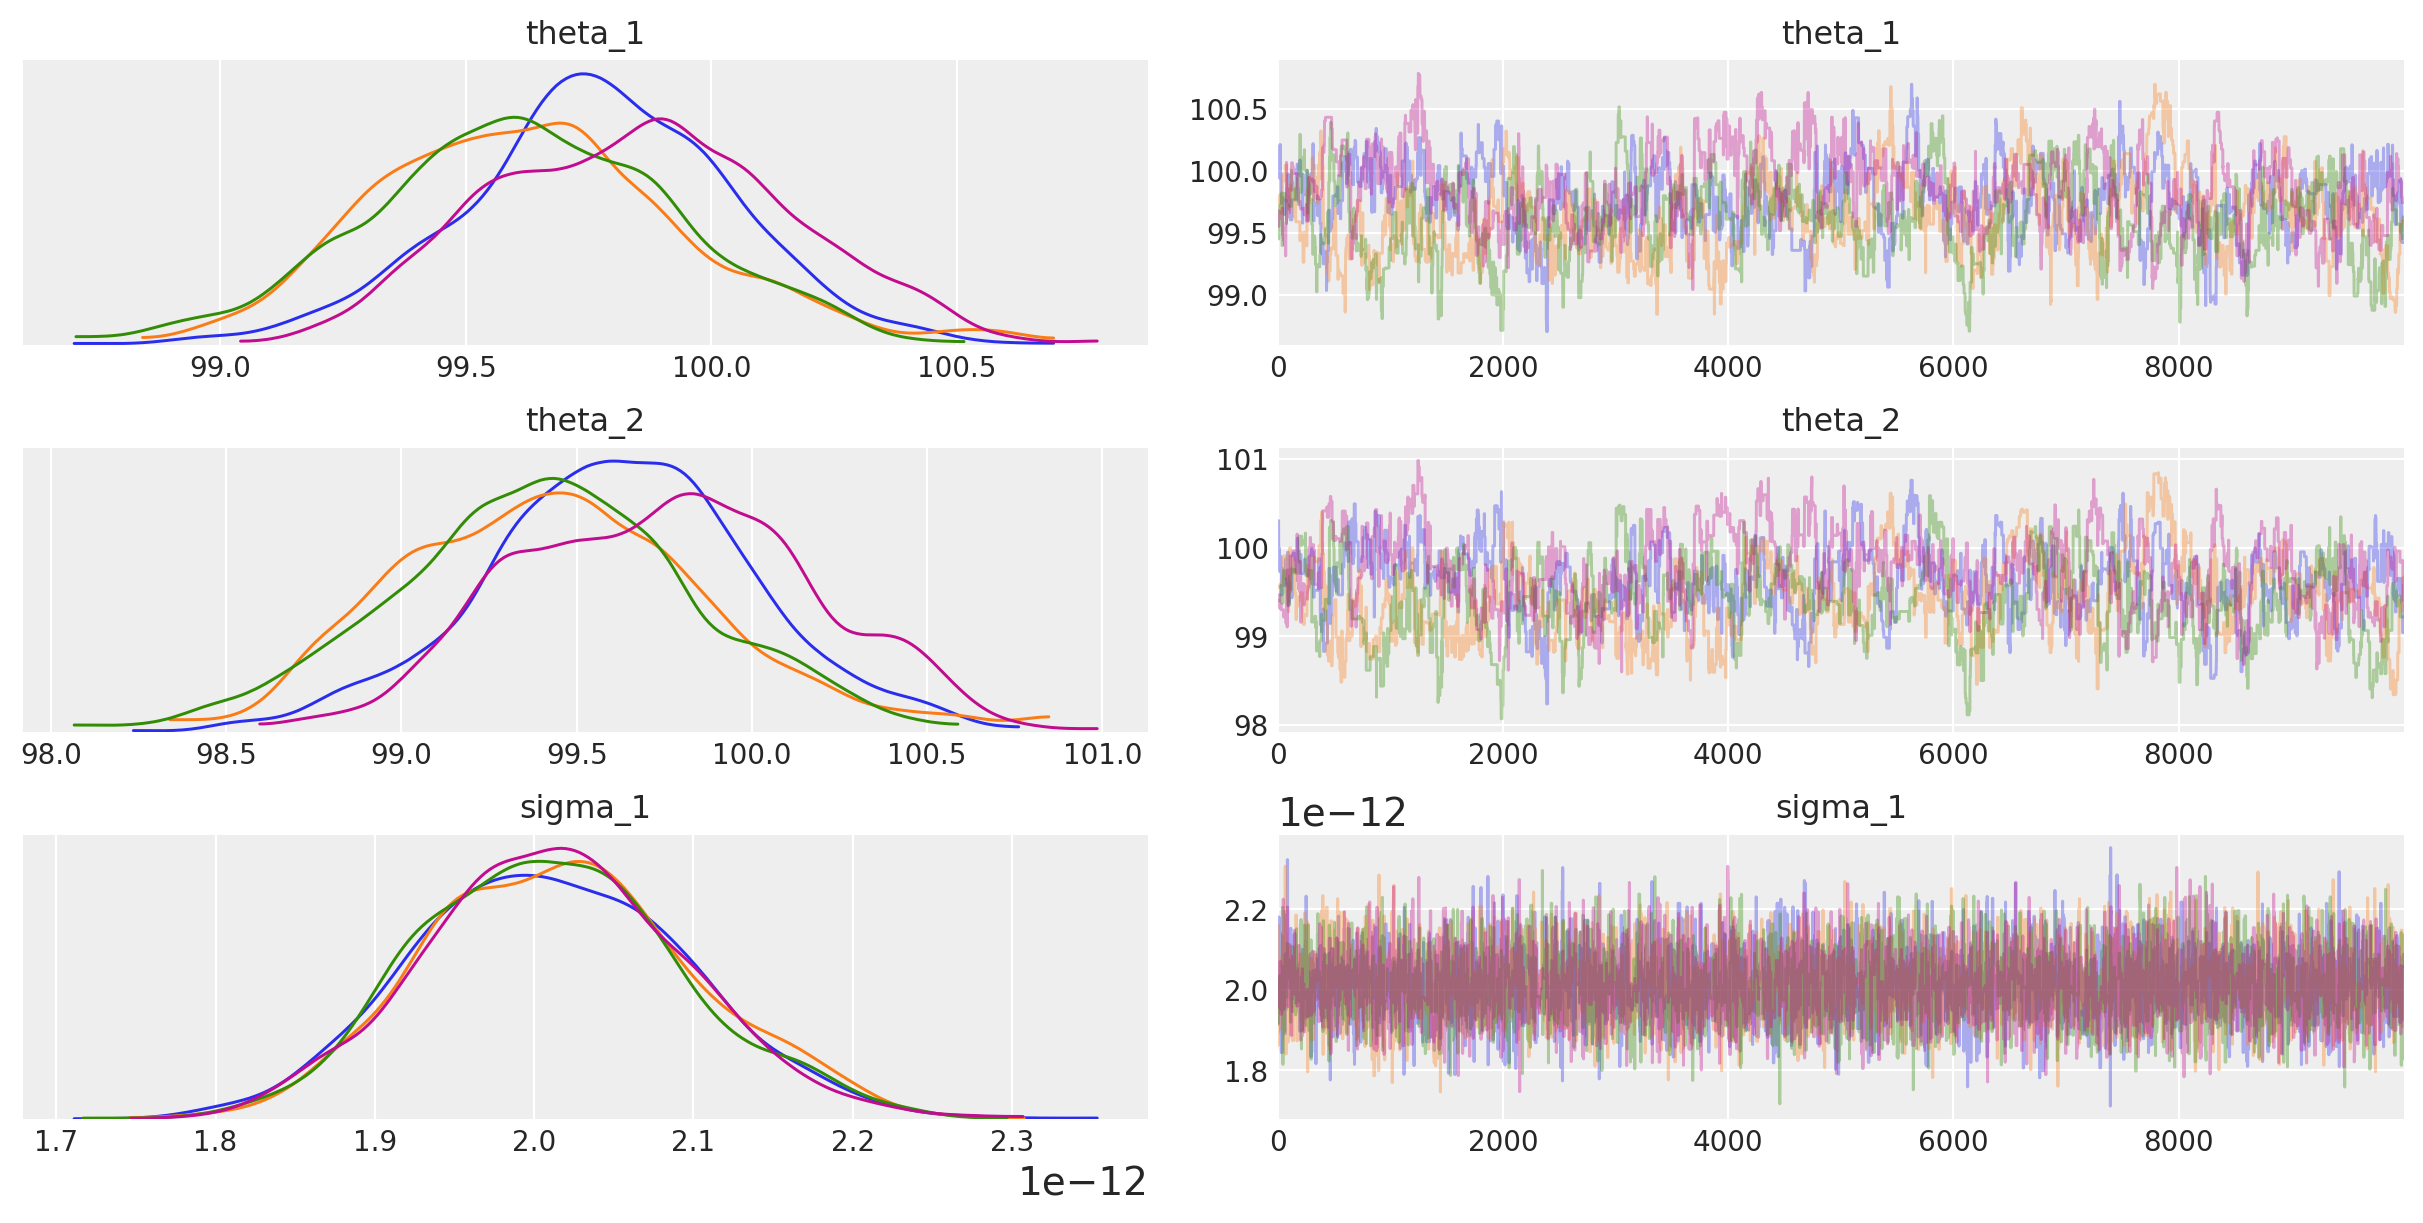

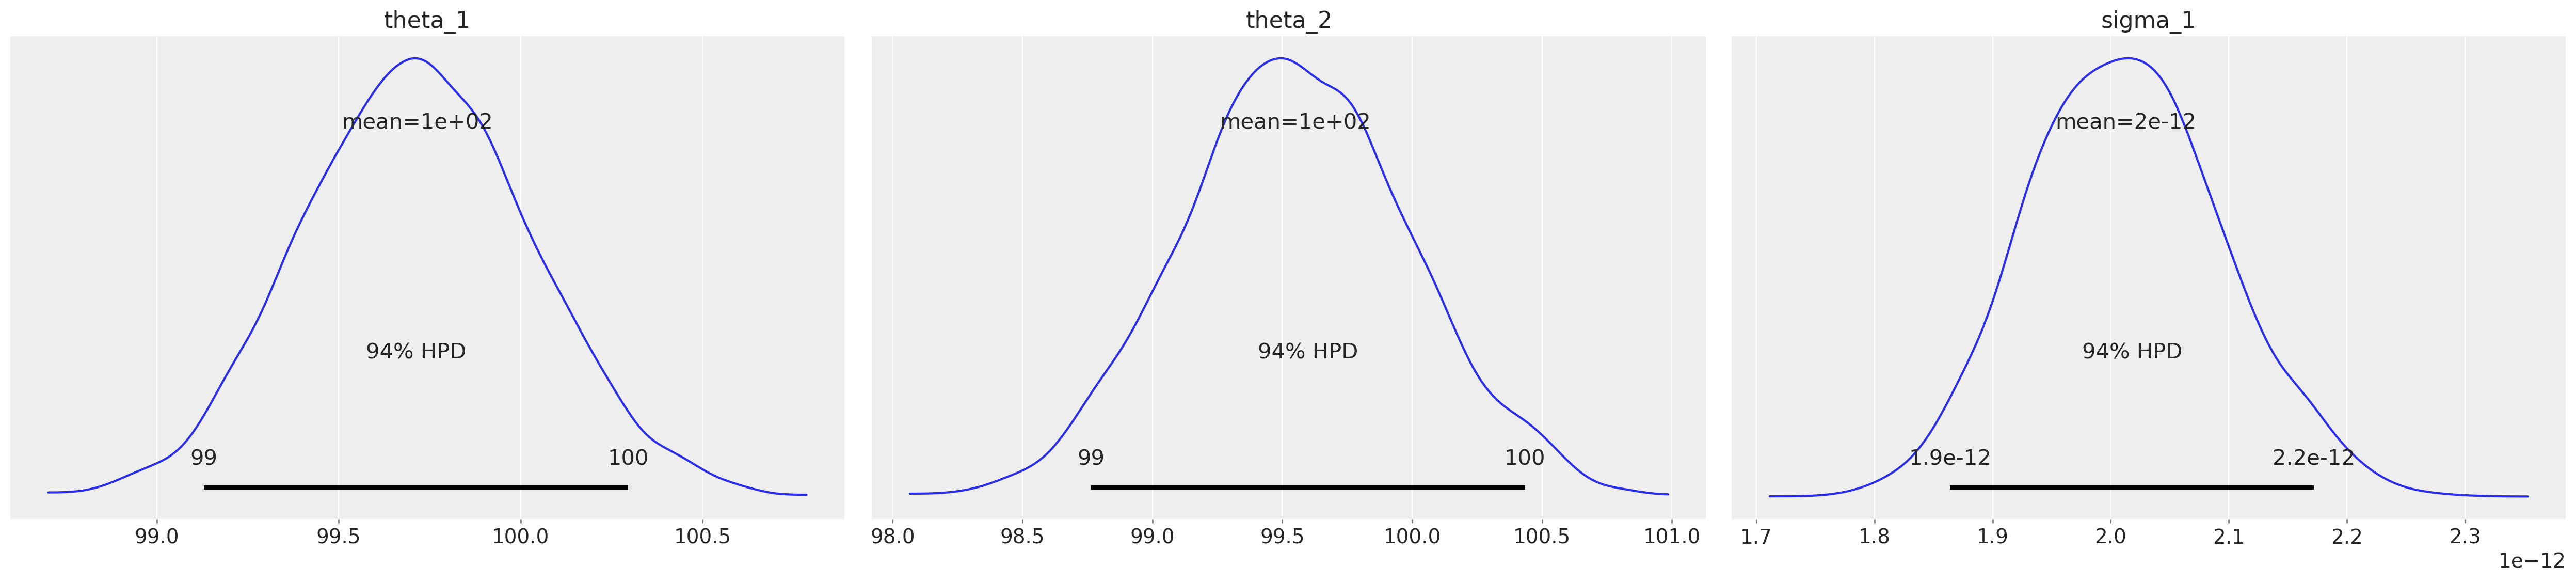

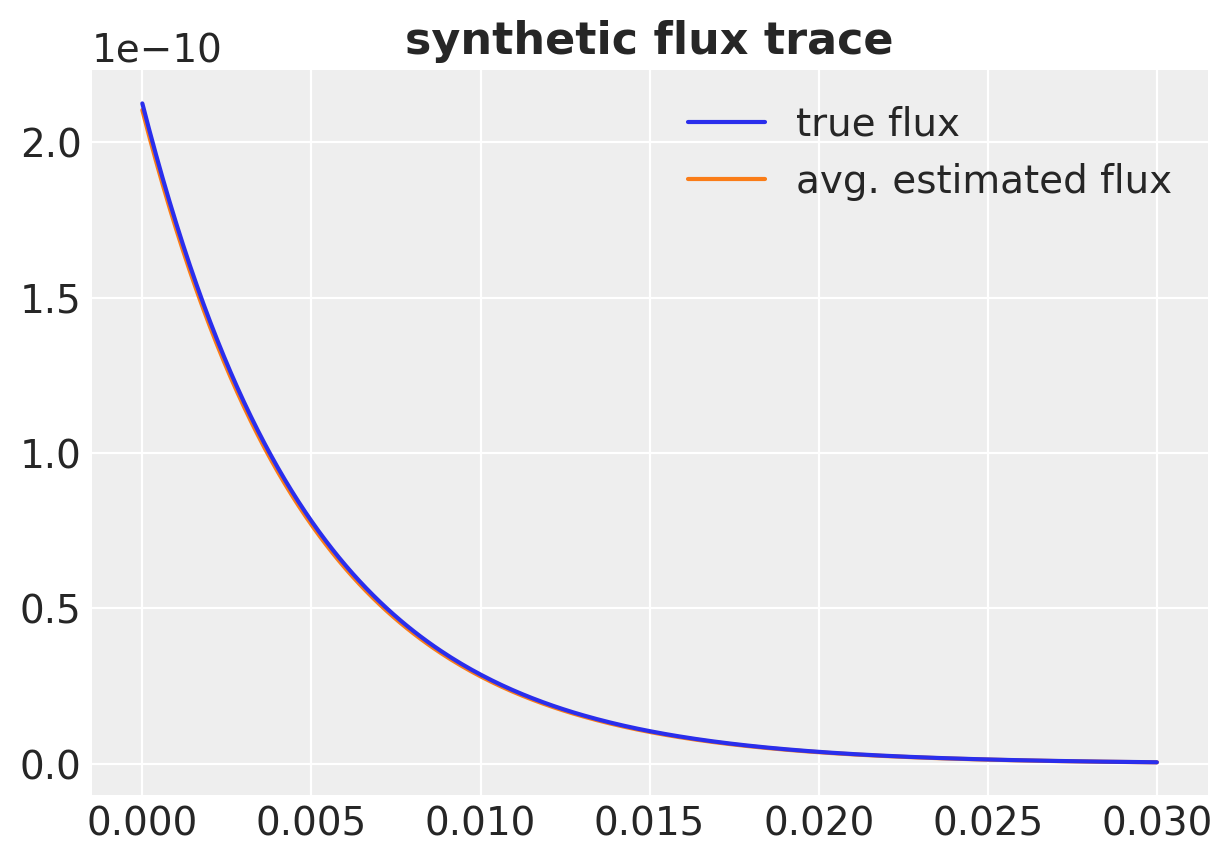

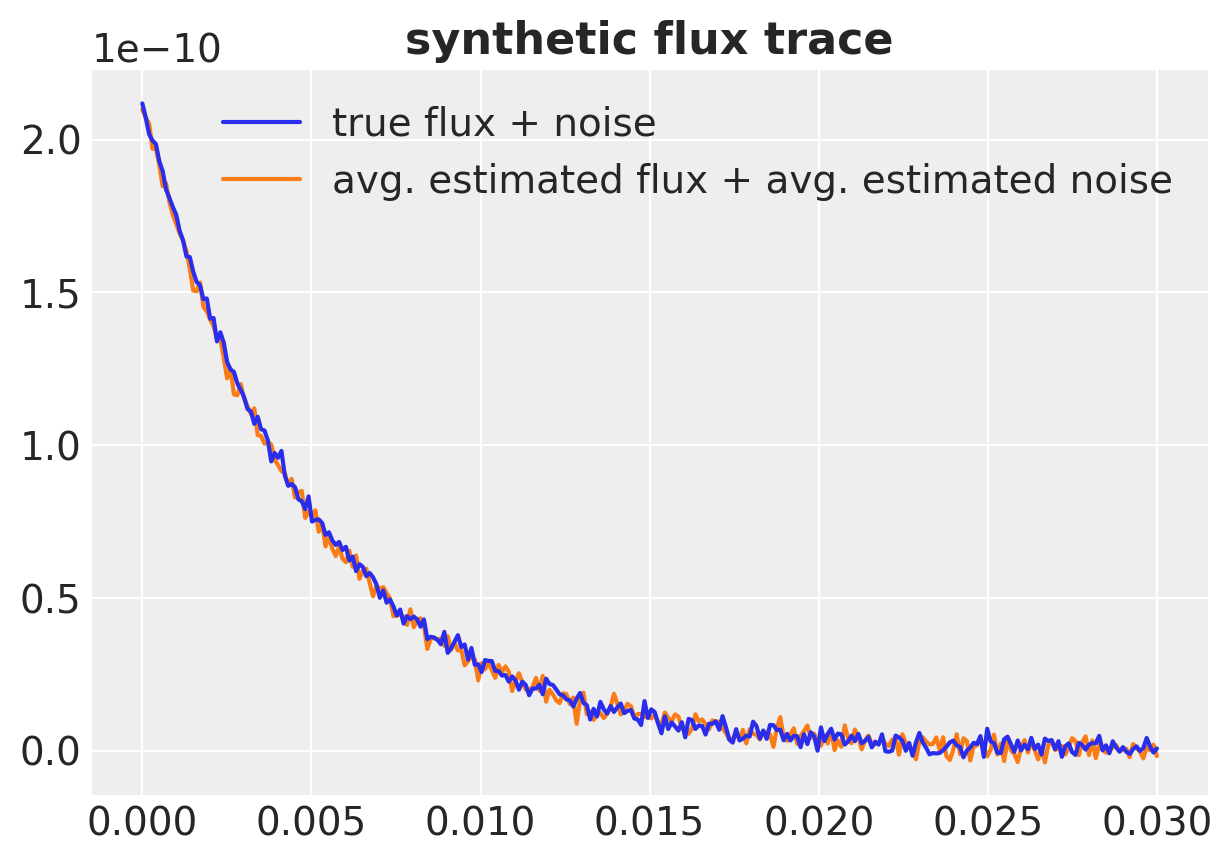

In [2]:
# plot traces and posterior distributions

az.plot_trace(trace)
az.plot_posterior(trace)
plt.show()

# true vs mean estimated flux w/o noise
flux_calc = flux_model([100,101])
plt.title('synthetic flux trace', fontweight='bold');
plt.plot(D.T[0], y_true, label='true flux', zorder=20);
plt.plot(D.T[0], flux_calc, label='avg. estimated flux', zorder=15);
plt.legend()
plt.show()

# true vs mean estimated flux w/ noise
flux_obs = flux_calc + np.random.normal(loc=0.0, scale=2.2e-12, size=np.size(y_true))
plt.title('synthetic flux trace', fontweight='bold');
plt.plot(D.T[0], y_obs, label='true flux + noise', zorder=10);
plt.plot(D.T[0], flux_obs, label='avg. estimated flux + avg. estimated noise', zorder=5);
plt.legend()
plt.show()


### Sequential Monte Carlo

Sequentual Monte Carlo (SMC) aids in the sampling of complex distributions with multiple local minima - which can lead to MCMC chains getting trapped. SMC combines tempering, importantce sampling, and MCMC sampling. 

The posterior can be written as: $p(\theta|y)_{\beta} \propto p(y|\theta)^{\beta}p(\theta)$ where $\beta$ is the in the inverse temperature (0,1). At $\beta = 0$ the posterior is sampled from prior (likelihood = 1), and at $\beta = 0$ the true posterior is sampled. 

SMC steps (overview): 
1. sample from a tempered distribution
2. re-weight the samples
3. decrease temperature and re-sample
4. repeat until low (0) temperature

Ref: https://docs.pymc.io/notebooks/SMC2_gaussians.html 

In [6]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import root
import arviz as az
import pymc3 as pm
import theano.tensor as tt
import tellurium as te



# Set display options
%config InlineBackend.figure_format = 'retina'
az.style.use('arviz-darkgrid')

def my_logl(v):
        return logl(v)
    
# define a theano Op for our likelihood function
class LogLike(tt.Op):

    """
    Declare which datatype will be inputed and outputed when the Op is called.

    Modified from: 
    1) https://docs.pymc.io/notebooks/blackbox_external_likelihood.html
    2) https://stackoverflow.com/questions/64267546/blackbox-likelihood-example

    """

    itypes = [tt.dvector]  # input is a vector (model parameters)
    otypes = [tt.dscalar]  # outputs is a scalar (log-likelihood)

    def __init__(self, loglike, data):
        '''Initialize with required parameters to calculate the log-likelihood '''

        # inputs are class attributes
        self.likelihood = loglike  # a likelihood function
        self.data = data  # the observed data

    def perform(self, node, inputs, outputs):
        ''' this method is used when calling the Op'''

        (theta,) = inputs  # parameter values

        # call the custom log-likelihood function
        logl = self.likelihood(self.data, theta)

        # output the log-likelihood
        outputs[0][0] = np.array(logl)  



# how the log-likelihood (Normal) is calculated
def log_likelihood(y_obs, theta):
    '''normal log_likelihood'''

    k = [theta[0], theta[1]]
    sigma = theta[2]
    y_pred = flux_model(k)  # calculate predicted flux

    # Normal log likelihood = -(n/2)ln(2*pi) -(n/2)ln(sigma^2) -(1/(2simga^2))SUM(x_i-mu)^2
    logp = -len(y_obs) * np.log(np.sqrt(2.0 * np.pi) * sigma)
    logp += -np.sum((y_obs - y_pred) ** 2.0) / (2.0 * sigma ** 2.0) 
    return logp


# how the flux is calculated (update model k's then calculate flux)
def flux_model(k):
    '''single rxn network: OF <--> IF'''

    k1 = k[0]
    k2 = k[1]
    m.reset()  # reset rate model to initial conditions
    m['rxn1_k1'] = k1
    m['rxn1_k2'] = k2
    D1 = m.simulate(0,3e-2,300, selections=['time', 'rxn1'])
    y_calc = D1.T[1]
    return y_calc


# example model created using antimony for Tellurium
antimony_str = '''
// Created by libAntimony v2.12.0
model *myModel()

  // Compartments and Species:
  compartment compartment_;
  species A in compartment_, B in compartment_;

  // Reactions:
  rxn1: A -> B; compartment_*(rxn1_k1*A - rxn1_k2*B);

  // Species initializations:
  A = 4.25e-08;
  A has substance_per_volume;
  B = 2.125e-08;
  B has substance_per_volume;

  // Compartment initializations:
  compartment_ = 0.0001;
  compartment_ has volume;

  // Variable initializations:
  rxn1_k1 = 100;
  rxn1_k2 = 100;

  // Other declarations:
  const compartment_, rxn1_k1, rxn1_k2;

  // Unit definitions:
  unit substance_per_volume = mole / litre;
  unit volume = litre;
  unit length = metre;
  unit area = metre^2;
  unit time_unit = second;
  unit substance = mole;
  unit extent = mole;

  // Display Names:
  time_unit is "time";
end
'''

# load the anitmony string and convert it into a Tellurium model
m = te.loada(antimony_str)

# set the ODE integration settings 
m.integrator.absolute_tolerance = 1e-16
m.integrator.relative_tolerance = 1e-12

# true parameter values for ref
k1_true = 1e2
k2_true = 1e2
sd_true = 2e-12

# simulate 'observed' data
D = m.simulate(0,3e-2,300, selections=['time', 'rxn1'])
y_true = D.T[1].copy()  # true data (no noise)
y_obs = y_true + np.random.normal(loc=0.0, scale=sd_true, size=np.size(y_true))  # add Guassian noise

# create Theano Op class for out custom likelihood
# inputs a function (custom likelihood) and observed data 
logl = LogLike(log_likelihood, y_obs)

        
# pym3 sampler settings    
n_parallel_chains = np.int(1e3)  # number of parallel MCMC chains for sampling


# use pymc3 to sample
with pm.Model():

    # set prior distributions w/ initial guess (testval)
    theta1 = pm.Uniform("theta_1", lower=0, upper=500,  testval=np.random.uniform(0,500))
    theta2 = pm.Uniform("theta_2", lower=0, upper=500,  testval=np.random.uniform(0,500))
    sigma1 = pm.Uniform("sigma_1", lower=1e-12, upper=5e-12, testval=np.random.uniform(1e-12,5e-12))

    # convert prior distributions to a tensor variable
    theta = tt.as_tensor_variable([theta1, theta2, sigma1])

    # create a likelihood 'potential' distribution
    # bug fix from tutorial: DensityDist does not work correctly
    # see: https://stackoverflow.com/questions/64267546/blackbox-likelihood-example
    # pm.Potential("like", logl(theta))  # debugging: alternative versions
    # pm.DensityDist(‘like’, my_mu(v), observed={‘v’: theta})  # debugging: alternative versions
    pm.DensityDist("likelihood", my_logl, observed={"v": theta})


    # use Metropolis MCMC sampling
    step = pm.Metropolis([theta1, theta2, sigma1])
    trace = pm.sample_smc(n_parallel_chains, parallel=False, random_seed=np.random.seed(0))
    print(pm.summary(trace).to_string())  # output sampling results in a table
    

Sample initial stage: ...
Stage:   0 Beta: 0.000 Steps:  25 Acce: 1.000
Stage:   1 Beta: 0.000 Steps:  25 Acce: 0.382
Stage:   2 Beta: 0.000 Steps:   9 Acce: 0.317
Stage:   3 Beta: 0.000 Steps:  12 Acce: 0.273
Stage:   4 Beta: 0.001 Steps:  14 Acce: 0.284
Stage:   5 Beta: 0.004 Steps:  13 Acce: 0.296
Stage:   6 Beta: 0.012 Steps:  13 Acce: 0.285
Stage:   7 Beta: 0.028 Steps:  13 Acce: 0.263
Stage:   8 Beta: 0.061 Steps:  15 Acce: 0.271
Stage:   9 Beta: 0.143 Steps:  14 Acce: 0.302
Stage:  10 Beta: 0.346 Steps:  12 Acce: 0.304
Stage:  11 Beta: 0.878 Steps:  12 Acce: 0.277
Stage:  12 Beta: 1.000 Steps:  14 Acce: 0.243
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)


            mean     sd  hpd_3%  hpd_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  ess_bulk  ess_tail  r_hat
theta_1  100.165  0.304  99.584  100.723      0.010    0.007     946.0   946.0     952.0     798.0    NaN
theta_2  100.034  0.428  99.236  100.844      0.014    0.010     879.0   878.0     885.0     975.0    NaN
sigma_1    0.000  0.000   0.000    0.000      0.000    0.000     996.0   996.0     991.0    1072.0    NaN


/Users/work/opt/anaconda3/envs/py_BPS21/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning:

Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used

/Users/work/opt/anaconda3/envs/py_BPS21/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning:

Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used

/Users/work/opt/anaconda3/envs/py_BPS21/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning:

Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used



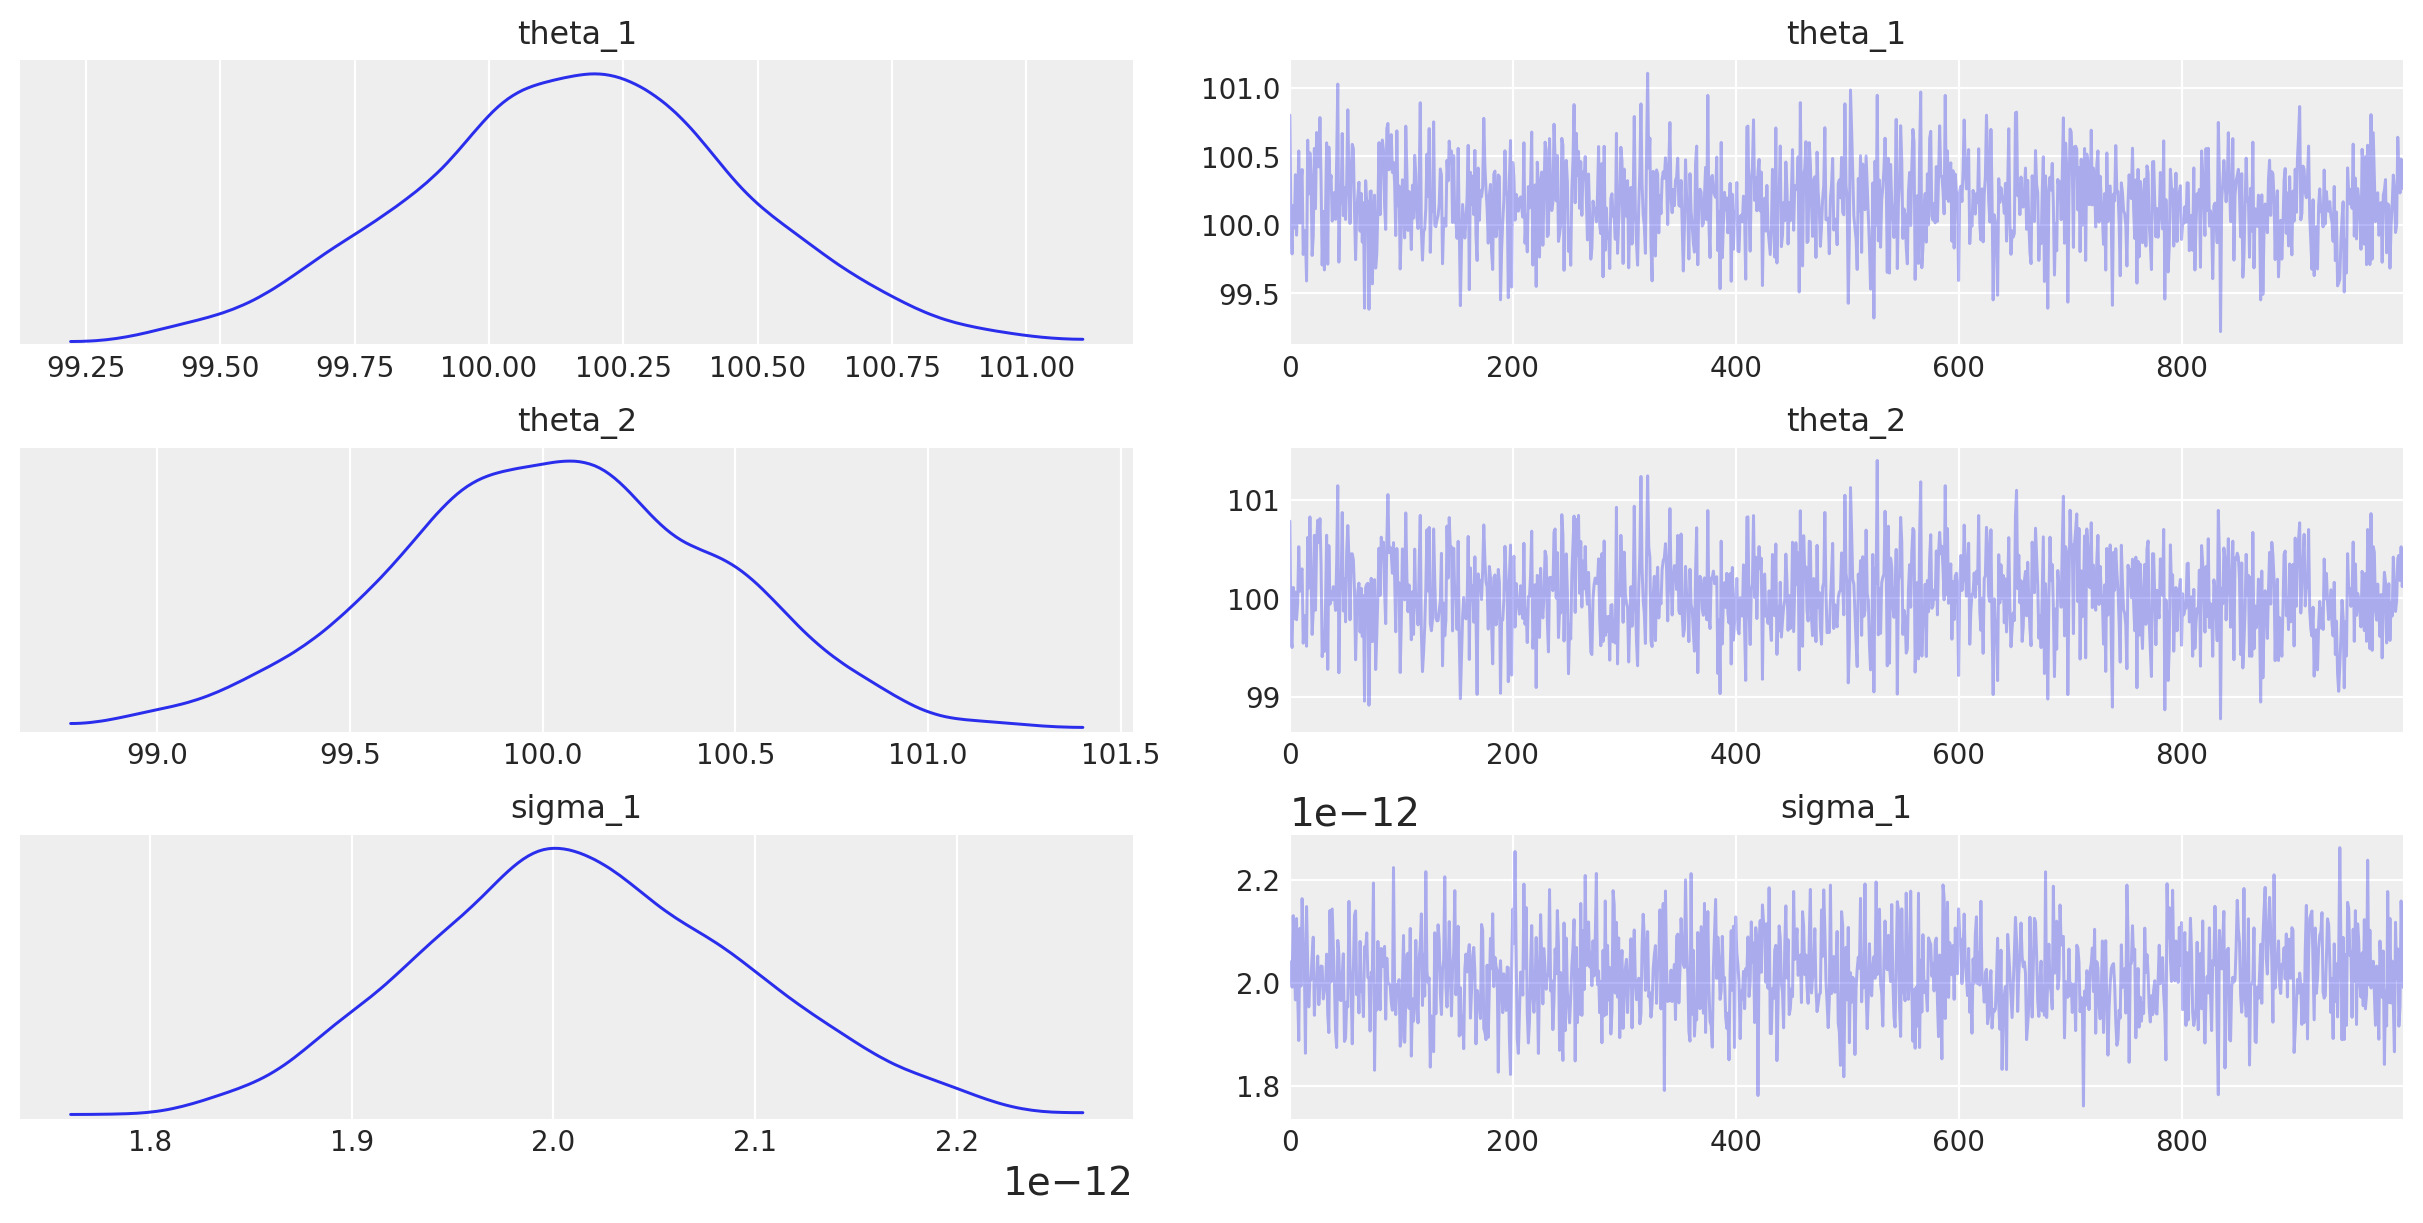

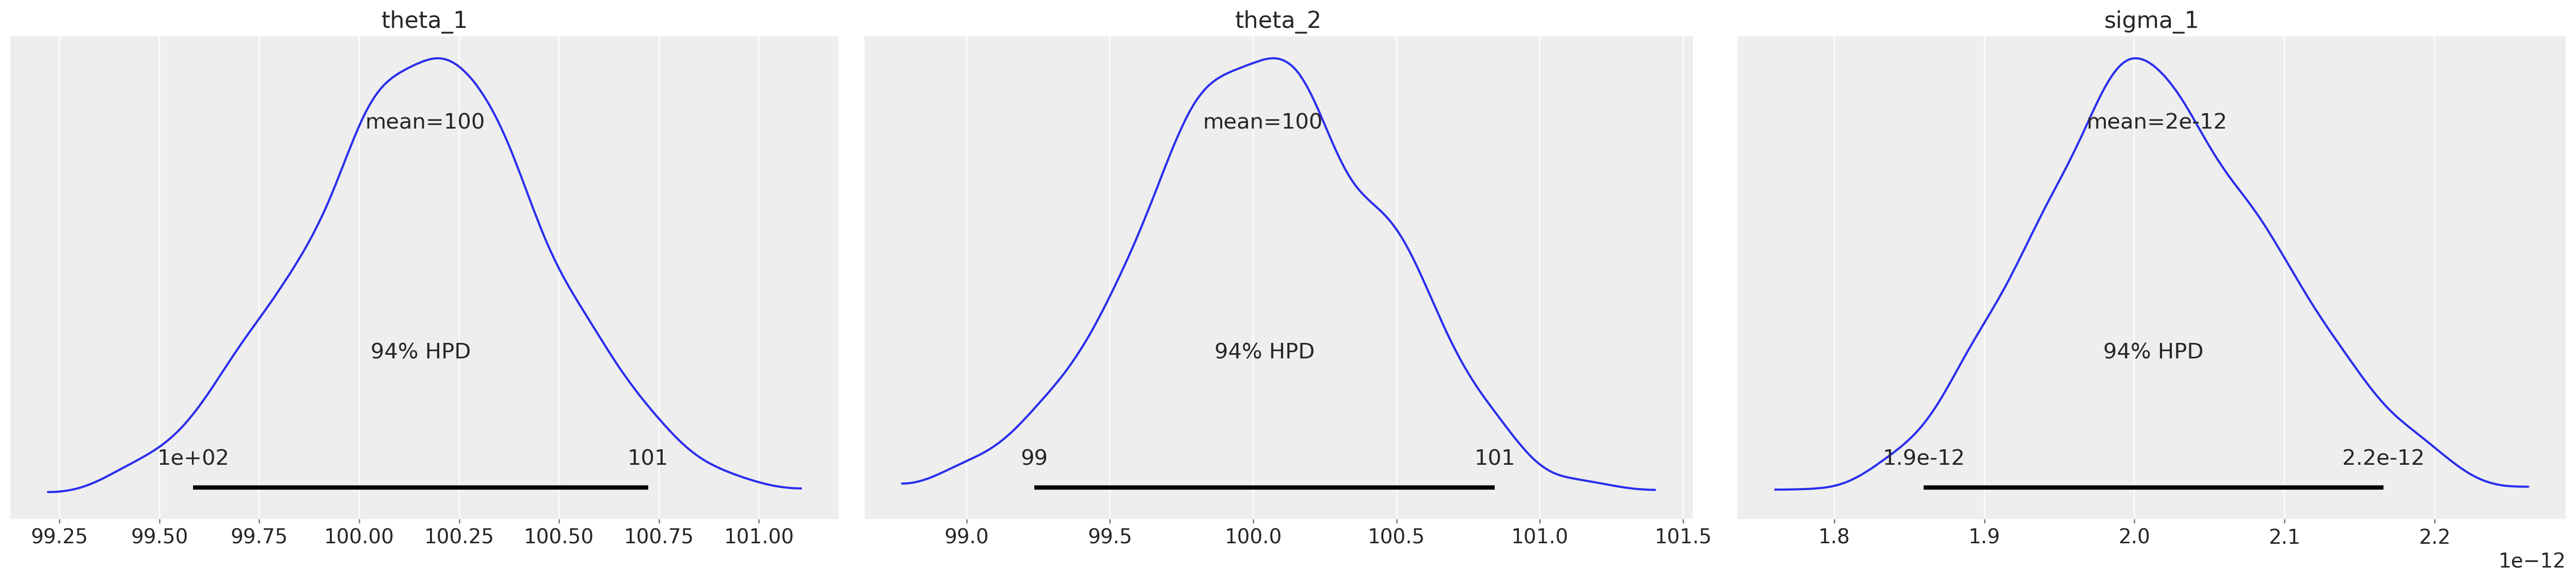

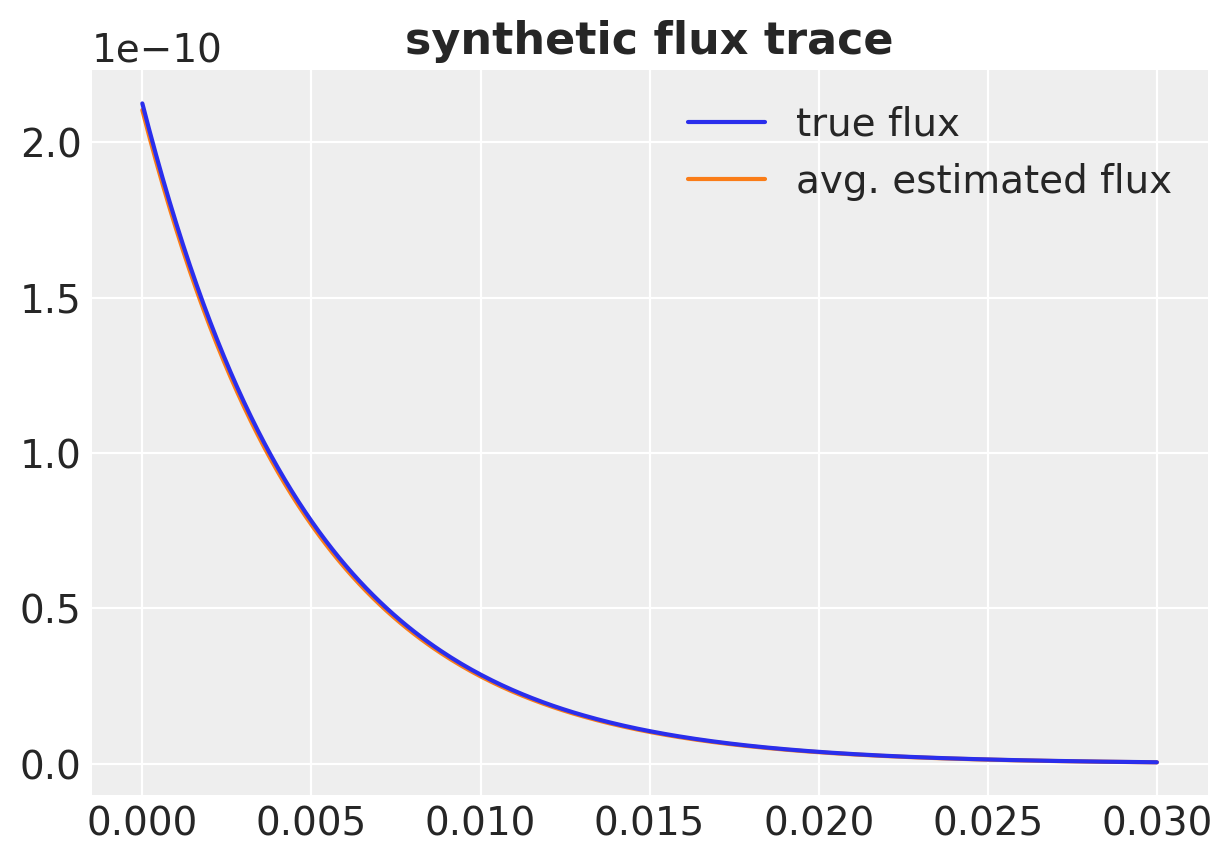

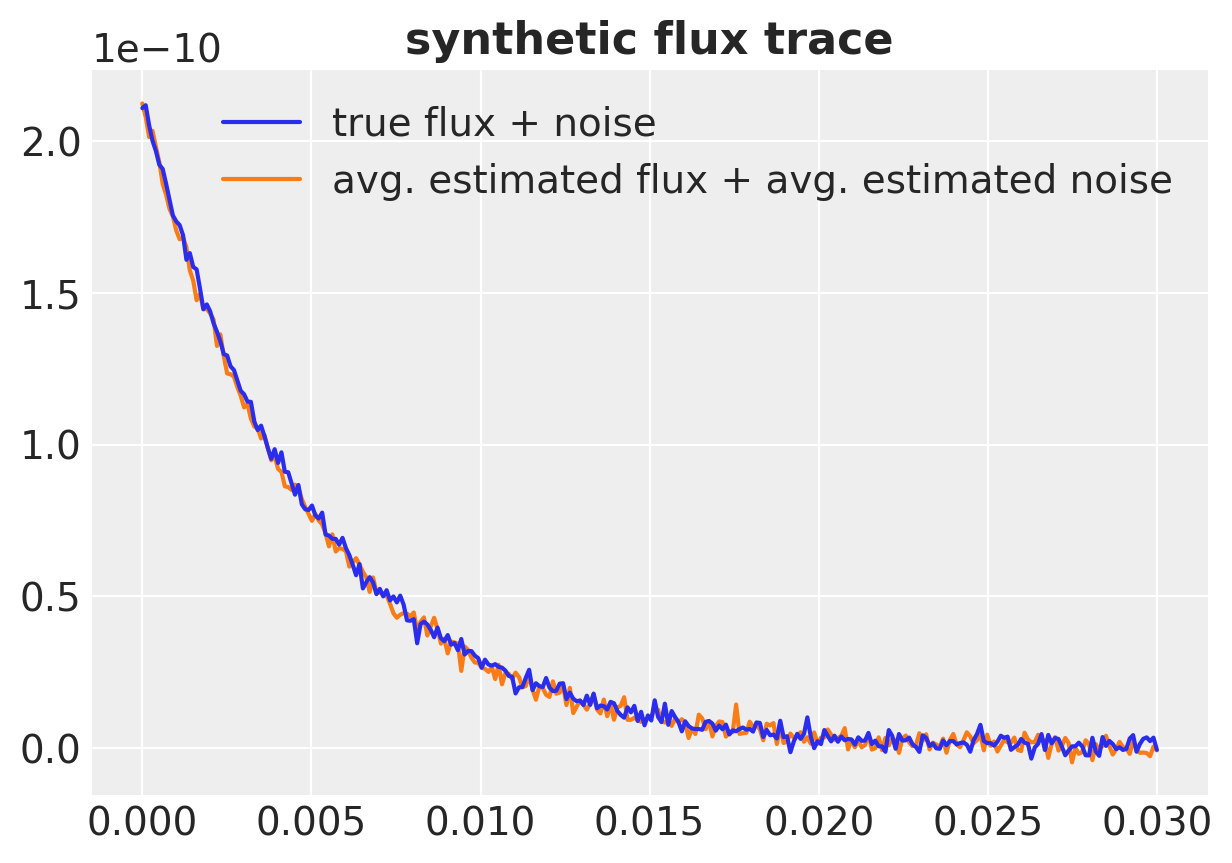

In [7]:
# plot traces and posterior distributions

az.plot_trace(trace)
az.plot_posterior(trace)
plt.show()

# true vs mean estimated flux w/o noise
flux_calc = flux_model([100,101])
plt.title('synthetic flux trace', fontweight='bold');
plt.plot(D.T[0], y_true, label='true flux', zorder=20);
plt.plot(D.T[0], flux_calc, label='avg. estimated flux', zorder=15);
plt.legend()
plt.show()

# true vs mean estimated flux w/ noise
flux_obs = flux_calc + np.random.normal(loc=0.0, scale=2.2e-12, size=np.size(y_true))
plt.title('synthetic flux trace', fontweight='bold');
plt.plot(D.T[0], y_obs, label='true flux + noise', zorder=10);
plt.plot(D.T[0], flux_obs, label='avg. estimated flux + avg. estimated noise', zorder=5);
plt.legend()
plt.show()

### Augmented AIS

1. Create a mesh grid in parameter space
2. Sample a point within each grid space
3. Calculate the log-likelihood of each point
4. Filter the top N samples 
5. Run the AIS algorithm starting at the top N samples

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import root
import arviz as az
import pymc3 as pm
import theano.tensor as tt
import tellurium as te



def my_logl(v):
    return logl(v)


# define a theano Op for our likelihood function
class LogLike(tt.Op):
    """
    Declare which datatype will be inputed and outputed when the Op is called.

    Modified from:
    1) https://docs.pymc.io/notebooks/blackbox_external_likelihood.html
    2) https://stackoverflow.com/questions/64267546/blackbox-likelihood-example

    """

    itypes = [tt.dvector]  # input is a vector (model parameters)
    otypes = [tt.dscalar]  # outputs is a scalar (log-likelihood)

    def __init__(self, loglike, data):
        '''Initialize with required parameters to calculate the log-likelihood '''

        # inputs are class attributes
        self.likelihood = loglike  # a likelihood function
        self.data = data  # the observed data

    def perform(self, node, inputs, outputs):
        ''' this method is used when calling the Op'''

        (theta,) = inputs  # parameter values

        # call the custom log-likelihood function
        logl = self.likelihood(self.data, theta)

        # output the log-likelihood
        outputs[0][0] = np.array(logl)

    # how the log-likelihood (Normal) is calculated


def log_likelihood(y_obs, theta):
    '''normal log_likelihood'''

    k = [theta[0], theta[1]]
    sigma = theta[2]
    y_pred = flux_model(k)  # calculate predicted flux

    # Normal log likelihood = -(n/2)ln(2*pi) -(n/2)ln(sigma^2) -(1/(2simga^2))SUM(x_i-mu)^2
    logp = -len(y_obs) * np.log(np.sqrt(2.0 * np.pi) * sigma)
    logp += -np.sum((y_obs - y_pred) ** 2.0) / (2.0 * sigma ** 2.0)
    return logp


# how the flux is calculated (update model k's then calculate flux)
def flux_model(k):
    '''single rxn network: OF <--> IF'''

    k1 = k[0]
    k2 = k[1]
    m.reset()  # reset rate model to initial conditions
    m['rxn1_k1'] = k1
    m['rxn1_k2'] = k2
    D1 = m.simulate(0, 3e-2, 300, selections=['time', 'rxn1'])
    y_calc = D1.T[1]
    return y_calc


# example model created using antimony for Tellurium
antimony_str = '''
// Created by libAntimony v2.12.0
model *myModel()

  // Compartments and Species:
  compartment compartment_;
  species A in compartment_, B in compartment_;

  // Reactions:
  rxn1: A -> B; compartment_*(rxn1_k1*A - rxn1_k2*B);

  // Species initializations:
  A = 4.25e-08;
  A has substance_per_volume;
  B = 2.125e-08;
  B has substance_per_volume;

  // Compartment initializations:
  compartment_ = 0.0001;
  compartment_ has volume;

  // Variable initializations:
  rxn1_k1 = 100;
  rxn1_k2 = 100;

  // Other declarations:
  const compartment_, rxn1_k1, rxn1_k2;

  // Unit definitions:
  unit substance_per_volume = mole / litre;
  unit volume = litre;
  unit length = metre;
  unit area = metre^2;
  unit time_unit = second;
  unit substance = mole;
  unit extent = mole;

  // Display Names:
  time_unit is "time";
end
'''

# load the anitmony string and convert it into a Tellurium model
m = te.loada(antimony_str)

# set the ODE integration settings
m.integrator.absolute_tolerance = 1e-16
m.integrator.relative_tolerance = 1e-12

# true parameter values for ref
k1_true = 1e2
k2_true = 1e2
sd_true = 2e-12

# simulate 'observed' data
D = m.simulate(0, 3e-2, 300, selections=['time', 'rxn1'])
y_true = D.T[1].copy()  # true data (no noise)
y_obs = y_true + np.random.normal(loc=0.0, scale=sd_true, size=np.size(y_true))  # add Guassian noise

###---Augmented AIS routine---###

def filtered_AIS_pyMC3(p_in, N, y_obs, seed=None, verbose=False):
    """input: p_in, a list of tuples containing
                  (pyMC3 param. name, param. lower limit, param. upper limit, number of divisions)
              N, an integer number of the highest log-likelihood parameter sets to store
              y_obs, data for log-likelihood calculations
              seed, the random seed generator for repeated runs
              v, verbose option
       output: start_dict, a dictionary of parameter names and values to intialize pyMC3 SMC
    """

    def calc_mgrid_coord(p):
        """input: p, a list of single parameter coordinate lists
           output: coord, an array of parameter coordinates"""
        g = np.meshgrid(*p)
        coord = np.vstack(list(map(np.ravel, g))).T
        return coord

    def calc_p_coord(p_list, rand=False, rand_seed=None):
        """input: p_list, a list of parameter lower, upper, and number of divisions
                  rand, rand_seed, parameters to randomly adjust the coordinate list
           output: coord, an array of parameter coordinates
        """
        p = []
        for i, p_i in enumerate(p_list):
            p_i_coord = np.linspace(p_i[0], p_i[1], int(p_i[2]))
            if rand == True and rand_seed != None:
                p_i_dx = abs(p_i_coord[1] - p_i_coord[0])
                p_i_coord = p_i_coord + np.random.uniform(-1, 1, p_i_coord.size) * (p_i_dx / 2)
            p.append(p_i_coord)
        return p

    def calc_p_inv(a, low, up):
        return np.log((a - low) / (up - a))

    # preprocessing
    n_dim = len(p_in)
    p_names = np.transpose(np.transpose(p_in)[0])
    p_inv_names = [f'{i}_interval__' for i in p_names]
    p_inv_dict = []


    # convert parameter input tuple list into list of coordinates
    if seed != None:
        assert type(seed) == int
        coord = calc_mgrid_coord(calc_p_coord(np.transpose(np.transpose(p_in)[1:]).astype(float), True, seed))
    else:
        coord = calc_mgrid_coord(calc_p_coord(np.transpose(np.transpose(p_in)[1:]).astype(float)))

    # calculate likelihood
    # create array: row_i = parameter set_i, col_j = parameter values_j, log-likelihood_j
    d = np.zeros((len(coord) + 1, (n_dim) + 1))
    for i, coord_i in enumerate(coord):
        d[i + 1, 0:n_dim] = coord_i  # store parameter set, coord_i
        d[i + 1, n_dim] = log_likelihood(y_obs, coord_i)  # store log-likelihood

    # filter top N
    top_N = d[d[:, n_dim].argsort()][-N:]

    # convert to dictionary for pyMC3 SMC (AIS)

    start_dict = {}
    for i, j in enumerate(top_N.T[:-1]):
        temp_inv_list = []
        temp_p_name = p_in[i][0]
        temp_p_inv_name = p_inv_names[i]
        temp_low = p_in[i][1]
        temp_up = p_in[i][2]
        for v in j:
            temp_inv_list.append(calc_p_inv(v,temp_low, temp_up))
        start_dict[temp_p_inv_name] = temp_inv_list
        start_dict[temp_p_name] = j


    if verbose == True:
        print('test')
        print(f'INPUT:\n')
        print(f'parameter inputs: {p_in}\n')
        print(f'N = {N}\n')
        print(f'seed = {seed}\n')

        print(f'OUTPUT:\n')
        print(f'mesh grid coordinates: {coord}\n')
        print(f'total number of coordinates: {coord.shape[0]}\n')
        print(f'top {N} log-likelihoods: {top_N}\n')
        print(f'pyMC3 SMC (AIS) starting points dictionary: {start_dict}\n')


###--------------------------------###


# example: 

# set (pyMC3 parameter name, grid lower limit, grid upper limit, and number of grid divisons) for each parameter
p_input = [('k1', 50, 150, 50),
           ('k2', 95, 105, 10),
           ('sigma', 1e-12, 5e-12, 10)]


N = 10  # number of samples to filter to (start points for pyMC3 AIS)

start_points = filtered_AIS_pyMC3(p_input, N, y_obs, seed=0, verbose=True)

# create Theano Op class for out custom likelihood
# inputs a function (custom likelihood) and observed data
logl = LogLike(log_likelihood, y_obs)


# # pym3 sampler settings
n_walkers = N  # number of parallel MCMC chains for sampling


# use pymc3 to sample
with pm.Model():

    # set prior distributions w/ initial guess (testval)
    theta1 = pm.Uniform("k1", lower=50, upper=150)
    theta2 = pm.Uniform("k2", lower=95, upper=105)
    sigma = pm.Uniform("sigma", lower=1e-12, upper=5e-12)

    # convert prior distributions to a tensor variable
    theta = tt.as_tensor_variable([theta1, theta2, sigma])

    # create a likelihood 'potential' distribution
    log_like_p = pm.Potential("like", logl(theta))

    # use Metropolis MCMC sampling
    step = pm.Metropolis([theta1, theta2, sigma])
    trace = pm.sample_smc(n_walkers, n_steps = 100, tune_steps=100, chains=1, parallel=False, start=start_points)
    print(pm.summary(trace).to_string())  # output sampling results in a table

